In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Feature Selection Techniques

In [2]:
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Univariate Selection

In [8]:
X = df.iloc[:, :-1]
y = df['price_range']

In [9]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [10]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [12]:
# Importing required modules

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
# Applying SelectKBest

# making object of SelectKBest
ordered_rank_features = SelectKBest(score_func=chi2, k=20)

ordered_features = ordered_rank_features.fit(X, y)

In [21]:
df_scores = pd.DataFrame({'Score': ordered_features.scores_, 'Features': X.columns})


In [24]:
df_scores.sort_values(by=['Score'], ascending=False)

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


In [25]:
# Top 10 Features:
df_scores.nlargest(10, 'Score')

,Score,Features
13,931267.519053,ram
11,17363.569536,px_height
0,14129.866576,battery_power
12,9810.586750,px_width
8,95.972863,mobile_wt
6,89.839124,int_memory
15,16.480319,sc_w
16,13.236400,talk_time
4,10.135166,fc
14,9.614878,sc_h


## Feature Importance
This technique gives you a score for each feature of your data, the higher the score more relevant is the feature.

In [26]:
df = pd.read_csv("mobile_dataset.csv")

X = df.iloc[:, :-1]
y = df['price_range']

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [29]:
print('Feature Importance: ')
print(model.feature_importances_)

Feature Importance: 
[0.0616926  0.02003745 0.03335643 0.0194519  0.03248737 0.01687745
 0.03566715 0.0334827  0.03678027 0.03359541 0.03499025 0.04671682
 0.04886315 0.38772043 0.03401546 0.03400223 0.03593398 0.01512828
 0.01935917 0.0198415 ]


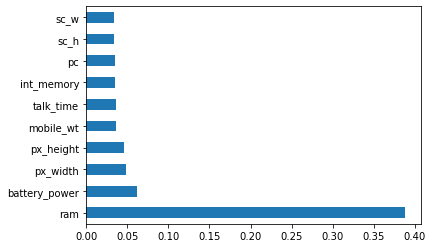

In [30]:
ranked_features = pd.Series(model.feature_importances_, index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')

## Correlation

In [2]:
df = pd.read_csv('mobile_dataset.csv')

In [3]:
corr = df.corr()

In [4]:
top_features = corr.index

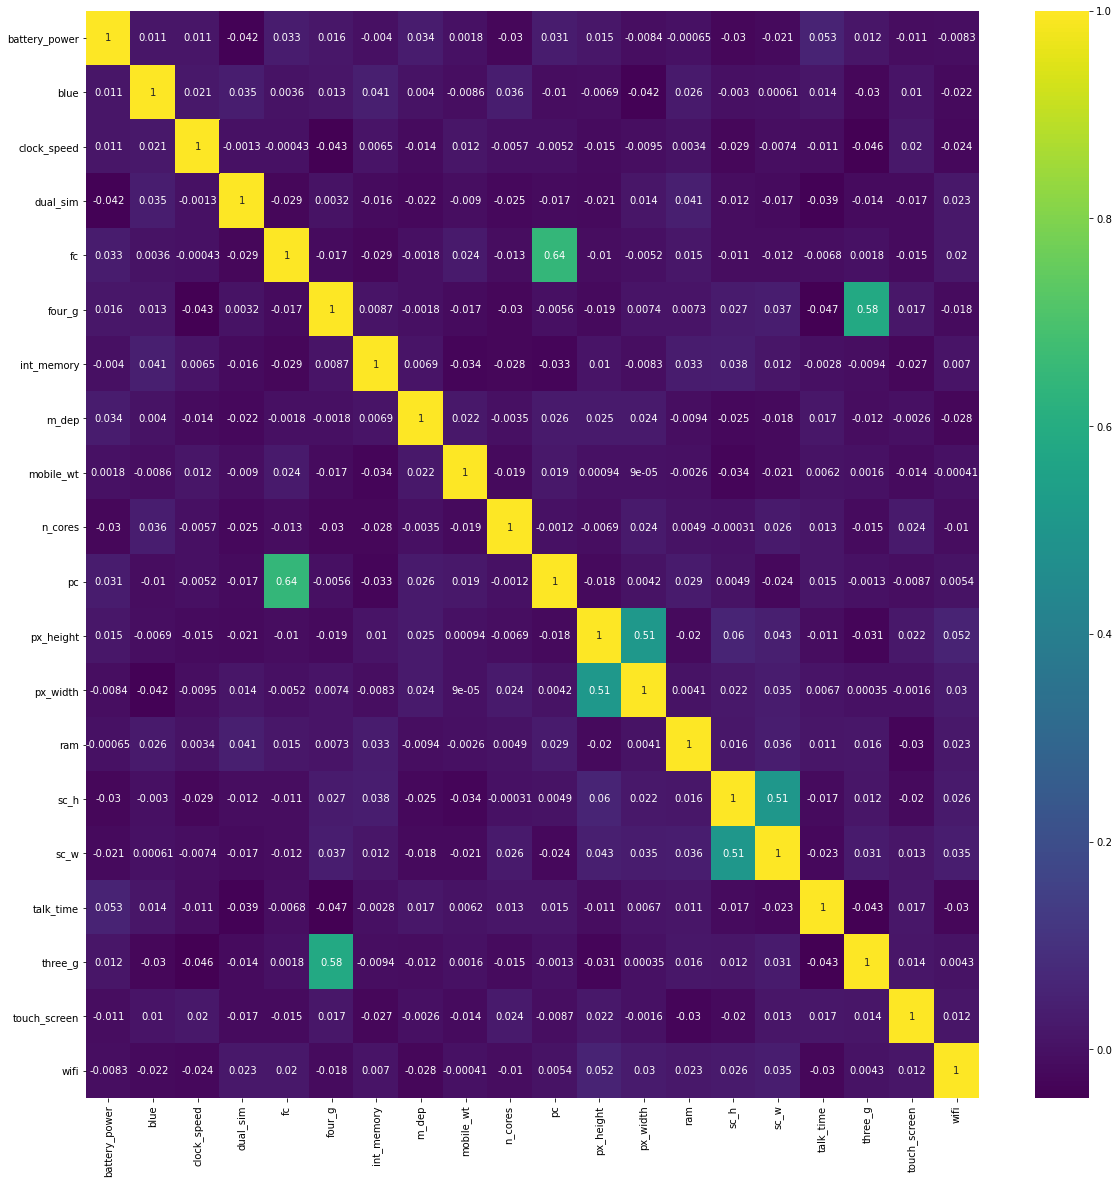

In [5]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='viridis')

In [6]:
# Removing correlated features (only the independent features)

# here we will drop features which are 80% or more correlated
threshold_value= 0.5

In [7]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                
    return list(col_corr)

In [8]:
correlation(df.iloc[:, :-1], threshold_value)

['sc_w', 'px_width', 'pc', 'three_g']

## Information Gain

In [9]:
from sklearn.feature_selection import mutual_info_classif

In [10]:
X = df.iloc[:, :-1]
y = df['price_range']

In [12]:
mutual_info_values = mutual_info_classif(X, y)

In [13]:
mutual_df = pd.Series(mutual_info_values, index=X.columns)

In [18]:
mutual_df.sort_values(ascending=False)
# the features which have zero value have no relation.(are independent)

ram              0.843765
talk_time        0.031863
px_width         0.029544
battery_power    0.026721
px_height        0.025554
fc               0.018833
int_memory       0.013312
mobile_wt        0.009427
sc_w             0.006869
dual_sim         0.006005
clock_speed      0.005943
three_g          0.005850
pc               0.000615
blue             0.000000
wifi             0.000000
four_g           0.000000
m_dep            0.000000
touch_screen     0.000000
sc_h             0.000000
n_cores          0.000000
dtype: float64

In [19]:
mutual_df.nlargest(10)

ram              0.843765
talk_time        0.031863
px_width         0.029544
battery_power    0.026721
px_height        0.025554
fc               0.018833
int_memory       0.013312
mobile_wt        0.009427
sc_w             0.006869
dual_sim         0.006005
dtype: float64